# Exploring Data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
#including csv files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
np.setdiff1d(train['Item_Identifier'], test['Item_Identifier'])

array(['DRE49', 'FDA04', 'FDG24', 'FDG33', 'FDL10', 'FDL34', 'FDO19',
       'FDO52', 'FDT07', 'FDU19', 'FDW13', 'FDX04', 'FDX20', 'NCL31',
       'NCQ06', 'NCY18'], dtype=object)

In [6]:
#Checking the format of sample submission
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


# Model 1- Mean (error : 1773.82514)

In [7]:
#create a submission of mean
mean = train.Item_Outlet_Sales.mean()
outdf = test.loc[:,["Item_Identifier","Outlet_Identifier"]]
outdf["Item_Outlet_Sales"] = pd.Series([mean]*test.size)

In [8]:
#check if mean is inserted properly
outdf.sample(5)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
4251,FDD03,OUT027,2181.288914
2282,FDW16,OUT017,2181.288914
2721,FDS47,OUT010,2181.288914
4955,FDV19,OUT045,2181.288914
5407,NCZ06,OUT035,2181.288914


In [9]:
#submission file
outdf.to_csv("sub.csv")

# Model 2- Mean by Location ( error:1764.55199 )

In [10]:
#find distribution of stores location wise
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [11]:
#calculate mean location wise
train_by_location = train.groupby("Outlet_Location_Type")
train_by_location.Item_Outlet_Sales.mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [12]:
#set location wise mean
def set_mean(location):
    if location == "Tier 1":
        return 1876.909159
    elif location == "Tier 2":
        return 2323.990559
    else:
        return 2279.627651
outdf = test.loc[:,["Item_Identifier","Outlet_Identifier"]]
outdf["Item_Outlet_Sales"] = test.Outlet_Location_Type.apply(lambda x: set_mean(x))

In [13]:
outdf.sample(5)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
4335,NCC55,OUT045,2323.990559
3610,FDR19,OUT018,2279.627651
2943,DRN37,OUT045,2323.990559
4758,NCH06,OUT046,1876.909159
1684,FDD02,OUT019,1876.909159


In [14]:
#write to submission csv
outdf.to_csv("sub.csv")

# Model 3-Linear Regression ( error: 1478.034674 )

## Creating Cross Validation

In [15]:
#spitting data for cross validation
X = train.loc[:,["Outlet_Establishment_Year", "Item_MRP", "Item_Weight"]]
x_train, x_cv, y_train, y_cv = train_test_split(X, train.Item_Outlet_Sales)

In [16]:
#Impute missing values 
mean_wieght = x_train.Item_Weight.mean()
x_train.Item_Weight = x_train.Item_Weight.fillna(mean_wieght)



mean_wieght = x_cv.Item_Weight.mean()
x_cv.Item_Weight = x_cv.Item_Weight.fillna(mean_wieght)

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
#Building Model and making prediction
lreg = LinearRegression()
lreg = lreg.fit(x_train, y_train)
pred = lreg.predict(x_cv)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [18]:
#calculating mse
mse = np.mean((pred-y_cv)**2)
print np.sqrt(mse)

1396.09101307


In [19]:
lreg

AttributeError: 'LinearRegression' object has no attribute 'summary'

## Creating Submission

In [17]:
#Impute missing values 
mean_wieght = train.Item_Weight.mean()
train.Item_Weight = train.Item_Weight.fillna(mean_wieght)

mean_wieght = test.Item_Weight.mean()
test.Item_Weight = test.Item_Weight.fillna(mean_wieght)

In [18]:
#Build the model on complete train and make prediction
features = ["Outlet_Establishment_Year","Item_MRP", "Item_Weight"]
lreg = LinearRegression()
lreg = lreg.fit(train.loc[:, features],train.loc[:,"Item_Outlet_Sales"])
pred = lreg.predict(test.loc[:,features])

In [19]:
#create submission file
outdf = test.loc[:,["Item_Identifier","Outlet_Identifier"]]
outdf["Item_Outlet_Sales"] = pred
outdf.to_csv("sub.csv")

In [20]:
#checking coefficients
lreg.coef_

array([-10.60176611,  15.56217307,  -1.18753875])

In [21]:
#R-square
lreg.score(train.loc[:,features],train.Item_Outlet_Sales)

0.32485181521300688

# Model 4 - Linear Regression with variable treatment and all features ( error: 1203.650456 )

In [165]:
#including csv files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")


### Feature Engineering

In [166]:
#Impute missing values
train.Item_Visibility.replace(0,train.Item_Visibility.mean(), inplace=True)
train.Item_Weight.fillna(train.Item_Weight.mean(), inplace=True)

test.Item_Visibility.replace(0,test.Item_Visibility.mean(), inplace=True)
test.Item_Weight.fillna(test.Item_Weight.mean(), inplace=True)

#Find How old is an outlet
train.Outlet_Establishment_Year = 2013-train.Outlet_Establishment_Year
test.Outlet_Establishment_Year = 2013-test.Outlet_Establishment_Year

test_ids = test.Item_Identifier
test_outlet_ids = test.Outlet_Identifier

In [167]:
#find categorical variables
cat_list = list(train.select_dtypes(include=['object']).columns)
for i in cat_list:
    print train[i].describe()
cat_list.remove("Item_Identifier")

count      8523
unique     1559
top       FDW13
freq         10
Name: Item_Identifier, dtype: object
count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object
count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object
count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object
count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object
count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object
count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object


In [168]:
#One Hot Encode all categorical
dummies = pd.get_dummies(train[cat_list], prefix=cat_list)
train.drop(cat_list, axis=1, inplace=True)
train = pd.concat([train,dummies], axis=1)

dummies = pd.get_dummies(test[cat_list], prefix=cat_list)
test.drop(cat_list, axis=1, inplace=True)
test = pd.concat([test,dummies], axis=1)

### Cross Validation

In [115]:
#Creating CV set
X = train.drop(["Item_Outlet_Sales","Item_Identifier"], axis = 1)
x_train, x_cv, y_train, y_cv = train_test_split(X, train.Item_Outlet_Sales, test_size = 0.3)

In [158]:
#Build Linear Regression Model
lreg = LinearRegression()
lreg = lreg.fit(x_train, y_train)
pred_cv = lreg.predict(x_cv)

In [160]:
mse = np.mean((pred_cv-y_cv)**2)
print np.sqrt(mse)

1158.45441959


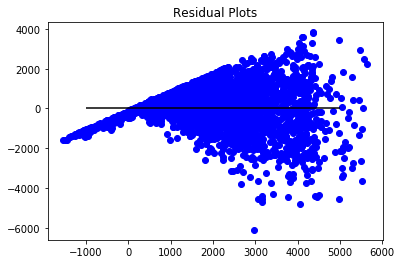

In [32]:
x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title("Residual Plots")
plt.show()

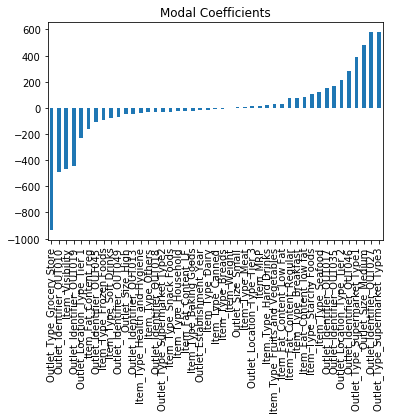

In [33]:
predictors = x_train.columns
coef = pd.Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')
plt.show()


### Submission

In [169]:
y = train.Item_Outlet_Sales
x = train.drop(["Item_Outlet_Sales","Item_Identifier"], axis=1)
test = test.drop("Item_Identifier", axis=1)

In [314]:
#Build Linear Regression Model
lreg = LinearRegression()
lreg = lreg.fit(x, y)
pred = lreg.predict(test)

In [315]:
outdf = pd.DataFrame({"Item_Identifier":test_ids,"Outlet_Identifier":test_outlet_ids,"Item_Outlet_Sales":pred})

In [316]:
outdf.to_csv("sub.csv")

# Model 5 - Ridge Regression ( error:1203.65078 )

### Cross Validation

In [156]:
#Build Model
from sklearn.linear_model import Ridge

rreg = Ridge()
rreg = rreg.fit(x_train, y_train)
pred_cv = rreg.predict(x_cv)

In [157]:
mse = np.mean((pred_cv-y_cv)**2)
print np.sqrt(mse)

1158.38209863


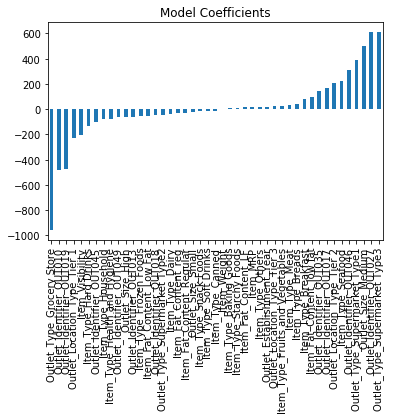

In [65]:
#Plot Coefficients
predictors  = x_train.columns
coef = pd.Series(rreg.coef_,predictors).sort_values()
coef.plot(kind="bar",title="Model Coefficients")
plt.show()

### Submission

In [95]:
#Build Model
from sklearn.linear_model import Ridge

#was getting better score without alpha and normalize
rreg = Ridge()
rreg = rreg.fit(x, y)
pred = rreg.predict(test)

In [96]:
outdf = pd.DataFrame({"Item_Identifier":test_ids,"Outlet_Identifier":test_outlet_ids,"Item_Outlet_Sales":pred})

In [97]:
outdf.to_csv("sub.csv")

# Model 6 - Lasso Regression ( error: 1202.92859 )

### Cross Validation

In [154]:
#Build Model
from sklearn.linear_model import Lasso

lasReg = Lasso(alpha=0.3, normalize=True)
lasReg = lasReg.fit(x_train,y_train)
pred_cv = lasReg.predict(x_cv)

In [155]:
mse = np.mean((pred_cv-y_cv)**2)
np.sqrt(mse)

1154.3463816351277

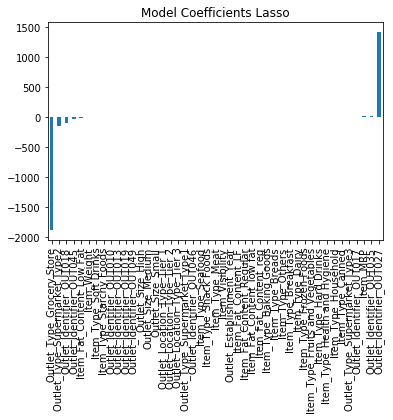

In [103]:
predictors = x_train.columns
coef = pd.Series(lasReg.coef_,predictors).sort_values()
coef.plot(kind="bar",title="Model Coefficients Lasso")
plt.show()

### Submission

In [109]:
lasReg = Lasso()
lasReg = lasReg.fit(x,y)
pred = lasReg.predict(test)

In [110]:
outdf = pd.DataFrame({"Item_Identifier":test_ids,"Outlet_Identifier":test_outlet_ids,"Item_Outlet_Sales":pred})

In [111]:
outdf.to_csv("sub.csv")

# Model 7 - Decision Tree Regressor (error: 1563.53009)

In [85]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.066132,182.0950,1998,732.3800,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.066132,53.8614,1987,994.7052,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


### Cross Validation

In [147]:
from sklearn.tree import DecisionTreeRegressor

dcr = DecisionTreeRegressor(random_state=0)
dcr = dcr.fit(x_train,y_train)
pred_cv = dcr.predict(x_cv)

In [148]:
mse = np.mean((pred_cv-y_cv)**2)
np.sqrt(mse)

1570.5547590113647

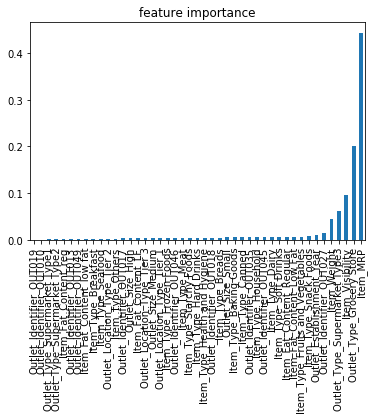

In [149]:
feats = pd.Series(dcr.feature_importances_,x.columns).sort_values()
feats.plot(kind="bar", title="feature importance")
plt.show()

### Submission

In [174]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0,n_estimators=500,max_features="sqrt",max_depth=20)
rfr = rfr.fit(x,y)
pred = rfr.predict(test)


In [175]:
outdf = pd.DataFrame({"Item_Identifier":test_ids,"Outlet_Identifier":test_outlet_ids,"Item_Outlet_Sales":pred})

In [176]:
outdf.to_csv("sub.csv")

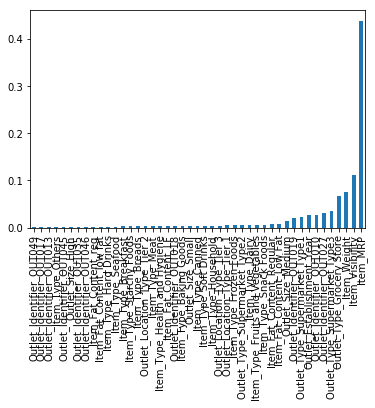

In [177]:
feat = pd.Series(rfr.feature_importances_, x.columns).sort_values()
feat.plot(kind="bar")
plt.show()